In [1]:
# 🔧 Стандартные библиотеки
import os
import random
import torch

# 📊 Работа с данными
import pandas as pd
import numpy as np

# 📈 Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# 🧪 Машинное обучение
from sklearn.model_selection import train_test_split


In [2]:
# 📍 Определим, где мы запускаемся
IS_KAGGLE = os.path.exists("/kaggle/input")
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"📦 Running on: {'Kaggle' if IS_KAGGLE else 'Local'}")
print(f"🚀 Device: {DEVICE}")


📦 Running on: Local
🚀 Device: cpu


📄 Base dataset shape: (151392, 16)
Total unique Case_IDs: 608

📊 Row and Case Counts:
       Set    Rows  Unique Cases
0     Base  151392           608
1    Train  121014           486
2  Holdout   30378           122


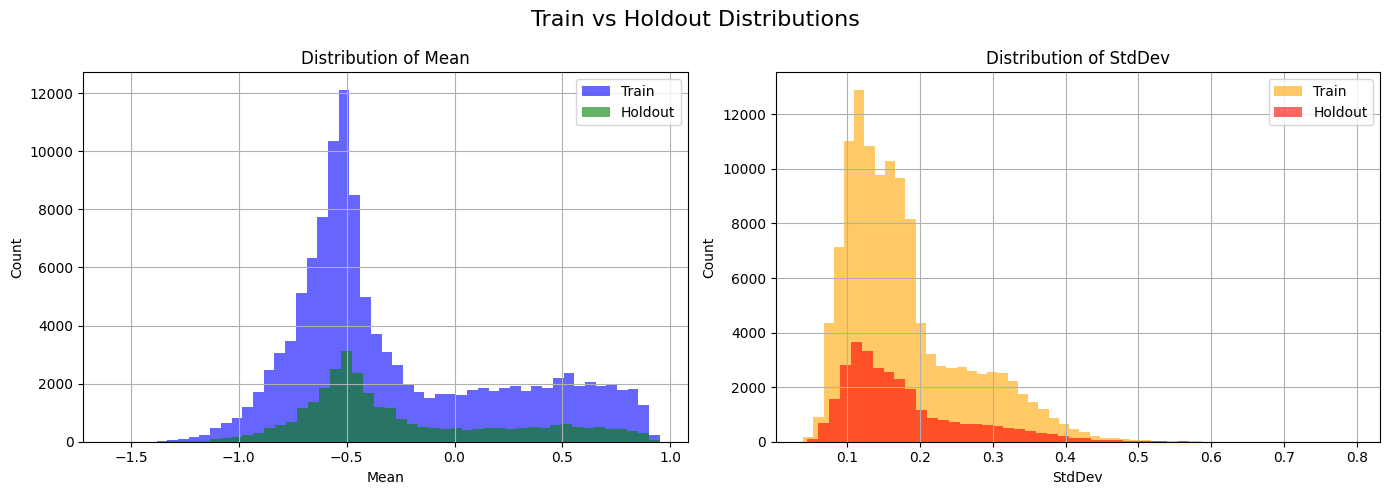

In [3]:
# 📂 Load base dataset
data_path = "/mnt/d/projects/wind_pressure_prediction_GNN/data/processed/windloading_interference_base.csv"
df = pd.read_csv(data_path)

# ✅ Create a string-based ID for each experimental "case"
# It is based on X_int, Y_int, and Ang — all are numeric features
df["Case_ID"] = (
    df["X_int"].astype(str) + "_" +
    df["Y_int"].astype(str) + "_" +
    df["Ang"].astype(str)
)

# 🧾 Show base info
print(f"📄 Base dataset shape: {df.shape}")


# 🔍 Unique case count
unique_cases = df["Case_ID"].unique()
print(f"Total unique Case_IDs: {len(unique_cases)}")
print()


# 🔀 Split by Case_ID
train_cases, holdout_cases = train_test_split(
    unique_cases, test_size=0.2, random_state=42
)

# 🧱 Create splits
train_df = df[df["Case_ID"].isin(train_cases)].reset_index(drop=True)
holdout_df = df[df["Case_ID"].isin(holdout_cases)].reset_index(drop=True)

# 💾 Save to files
train_df.to_csv("/mnt/d/projects/wind_pressure_prediction_GNN/data/processed/windloading_interference_train.csv", index=False)
holdout_df.to_csv("/mnt/d/projects/wind_pressure_prediction_GNN/data/holdout/windloading_interference_holdout.csv", index=False)

# 📋 Summary Table of Row and Case Counts
summary_df = pd.DataFrame({
    "Set": ["Base", "Train", "Holdout"],
    "Rows": [len(df), len(train_df), len(holdout_df)],
    "Unique Cases": [
        df["Case_ID"].nunique(),
        train_df["Case_ID"].nunique(),
        holdout_df["Case_ID"].nunique()
    ]
})

print("📊 Row and Case Counts:")
print(summary_df)

# 📊 Plot Mean and StdDev distributions for Train vs Holdout (on same axes)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Train vs Holdout Distributions", fontsize=16)

# Plot Mean
axes[0].hist(train_df["Mean"], bins=50, alpha=0.6, label="Train", color='blue')
axes[0].hist(holdout_df["Mean"], bins=50, alpha=0.6, label="Holdout", color='green')
axes[0].set_title("Distribution of Mean")
axes[0].set_xlabel("Mean")
axes[0].set_ylabel("Count")
axes[0].legend()
axes[0].grid(True)

# Plot StdDev
axes[1].hist(train_df["StdDev"], bins=50, alpha=0.6, label="Train", color='orange')
axes[1].hist(holdout_df["StdDev"], bins=50, alpha=0.6, label="Holdout", color='red')
axes[1].set_title("Distribution of StdDev")
axes[1].set_xlabel("StdDev")
axes[1].set_ylabel("Count")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [4]:
# 📂 Пути к файлам
train_path = "/mnt/d/projects/wind_pressure_prediction_GNN/data/processed/windloading_interference_train.csv"
holdout_path = "/mnt/d/projects/wind_pressure_prediction_GNN/data/holdout/windloading_interference_holdout.csv"

# 📥 Загрузка
train_df = pd.read_csv(train_path)
holdout_df = pd.read_csv(holdout_path)

# 🧪 Уникальные Case_ID
train_cases = set(train_df["Case_ID"].unique())
holdout_cases = set(holdout_df["Case_ID"].unique())

# 🔍 Найдём уникальные для холдаута
exclusive_holdout_cases = sorted(list(holdout_cases - train_cases))

# 📊 Вывод по одному в строку
print(f"✅ Уникальных Case_ID в холд-ауте (не встречаются в трейне): {len(exclusive_holdout_cases)}")
for case_id in exclusive_holdout_cases:
    print(case_id)



✅ Уникальных Case_ID в холд-ауте (не встречаются в трейне): 122
0_2_120
0_2_160
0_2_170
0_2_60
0_2_70
0_2_80
0_3_10
0_3_180
0_3_20
0_3_30
0_3_90
0_4_140
0_4_150
0_4_60
0_4_90
0_6_10
0_6_140
0_6_170
0_6_40
0_6_90
1_5_10
1_5_140
1_5_150
1_5_70
2_0_130
2_0_20
2_0_50
2_2_10
2_2_170
2_2_20
2_2_40
2_2_50
2_2_60
2_3_140
2_3_180
2_3_20
2_3_50
2_3_60
2_4_0
2_4_10
2_4_100
2_4_140
2_4_20
2_4_30
2_4_50
2_4_60
2_4_70
2_6_20
2_6_30
3_0_120
3_0_40
3_0_50
3_0_70
3_0_90
3_1_30
3_3_130
3_3_60
3_5_20
3_5_40
3_5_70
3_5_80
4_2_110
4_2_120
4_2_50
4_2_60
4_2_90
4_4_130
4_4_150
4_4_160
4_4_30
4_4_60
4_4_90
4_6_100
5_1_160
5_1_30
5_1_80
5_1_90
5_3_120
5_3_20
5_3_40
5_3_70
5_5_120
5_5_160
5_5_170
5_5_60
6_0_0
6_0_90
6_2_0
6_2_120
6_2_130
6_2_140
6_2_170
6_2_20
6_2_30
6_4_10
6_4_170
6_6_110
6_6_130
6_6_170
6_6_50
6_6_60
7_1_110
7_1_120
7_1_140
7_1_20
7_3_180
7_3_40
7_5_110
7_5_150
7_5_60
8_0_100
8_2_100
8_2_160
8_2_170
8_2_60
8_4_100
8_4_110
8_4_50
8_6_100
8_6_110
8_6_20
8_6_60


Train

In [5]:

# 🎯 Восстановление отсутствующих точек фасада
def restore_missing_facade_points(df, x_fac_values, y_fac_values, fill_method="zero"):
    filled_rows = []

    feature_cols = ["X_int", "Y_int", "Ang"]
    target_col = "Mean"

    for case_id, group in df.groupby("Case_ID"):
        full_grid = pd.MultiIndex.from_product(
            [x_fac_values, y_fac_values], names=["X_fac", "Y_fac"]
        ).to_frame(index=False)

        group_merged = pd.merge(
            full_grid,
            group,
            on=["X_fac", "Y_fac"],
            how="left"
        )

        group_merged["Case_ID"] = case_id

        # Пропущенные значения для Mean — интерполяция отдельно в каждом фасаде по X_fac
        if target_col in group_merged.columns:
            df_filled_parts = []

            # Секции фасадов
            facade_ranges = [(1, 7), (8, 14), (15, 21), (22, 28)]

            for x_min, x_max in facade_ranges:
                mask = (group_merged["X_fac"] >= x_min) & (group_merged["X_fac"] <= x_max)
                sub_df = group_merged[mask].copy()

                if not sub_df.empty:
                    # Пивот-таблица
                    pivot = sub_df.pivot(index="Y_fac", columns="X_fac", values=target_col)

                    # Интерполяция по X и по Y
                    pivot_interp = pivot.copy().interpolate(method='linear', axis=1).interpolate(method='linear', axis=0)

                    # Объединение оригинала с интерполированным
                    pivot_filled = pivot.combine_first(pivot_interp)

                    # Возврат в DataFrame
                    sub_df[target_col] = sub_df.apply(
                        lambda row: pivot_filled.loc[row["Y_fac"], row["X_fac"]],
                        axis=1
                    )

                df_filled_parts.append(sub_df)

            # Склеиваем обратно
            group_merged = pd.concat(df_filled_parts, ignore_index=True)

        for col in feature_cols:
            if col in group_merged.columns:
                fill_value = group[col].mean()
                group_merged[col] = group_merged[col].fillna(fill_value)
            else:
                group_merged[col] = fill_value


        filled_rows.append(group_merged)

    df_filled = pd.concat(filled_rows, ignore_index=True)
    return df_filled

# ✅ Используем восстановление отсутствующих точек
x_vals = sorted(train_df["X_fac"].unique())
y_vals = sorted(train_df["Y_fac"].unique())


train_df_clean = restore_missing_facade_points(train_df, x_vals, y_vals, fill_method="mean")

In [6]:
def plot_pressure_comparison(df_before, df_after, case_id_sample=None):
    """
    Строит карты давления до и после восстановления,
    с чёткими подписями X_fac от 2 до 28, выровненными по центру ячеек.
    """
    if case_id_sample is None:
        case_id_sample = random.choice(df_before["Case_ID"].unique())

    df_b = df_before[df_before["Case_ID"] == case_id_sample]
    df_a = df_after[df_after["Case_ID"] == case_id_sample]

    fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

    x_order = list(range(1, 29))  

    for ax, df_, title in zip(axes, [df_b, df_a], ["До восстановления", "После восстановления"]):
        pivot = df_.pivot(index="Y_fac", columns="X_fac", values="Mean")

        # 🔁 Приводим столбцы к нужному порядку с добавлением недостающих
        pivot = pivot.reindex(columns=x_order)

        sns.heatmap(pivot, ax=ax, cmap="coolwarm", annot=False, cbar=True)

        # Вертикальные линии по фасадам
        for x_line in [7+1, 14+1, 21+1]:
            try:
                idx = x_order.index(x_line)
                ax.axvline(x=idx, color="black", linestyle="--", linewidth=0.8)
            except ValueError:
                pass

        # Заголовок и подписи
        ax.set_title(f"{title} (Case_ID: {case_id_sample})")
        ax.invert_yaxis()
        ax.set_xlabel("X_fac")
        ax.set_ylabel("Y_fac")

        # ✅ Чёткие подписи по центру ячеек
        ax.set_xticks([i + 0.5 for i in range(len(x_order))])
        ax.set_xticklabels(x_order, rotation=0, ha='center')


    plt.show()

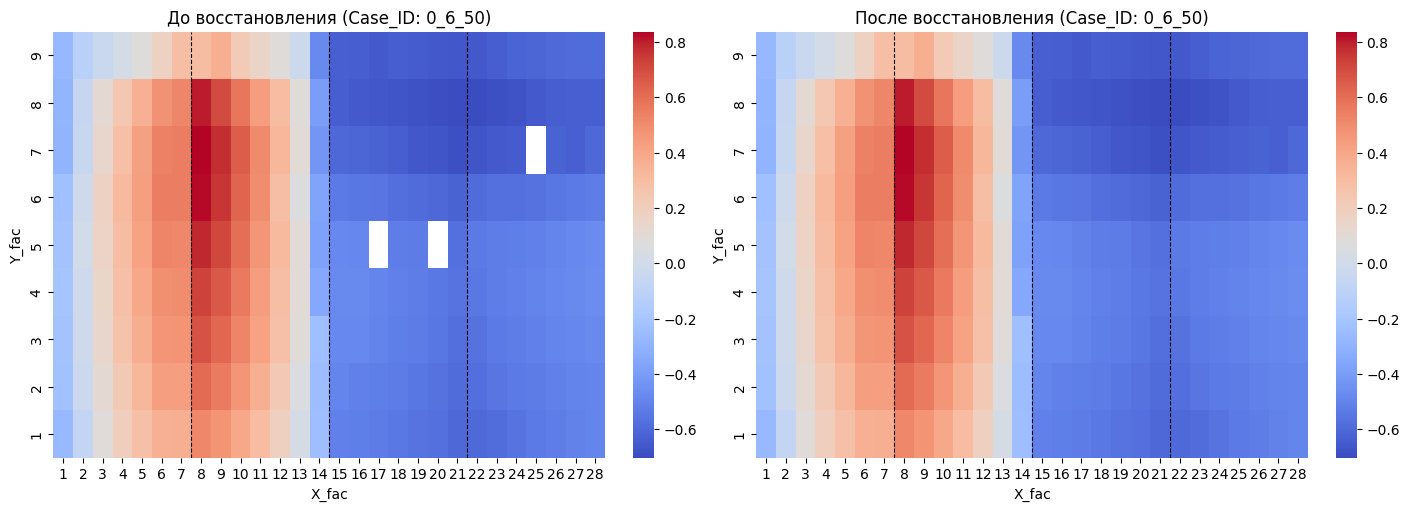

In [7]:
# Вызов визуализации
plot_pressure_comparison(train_df, train_df_clean)

In [8]:
import pandas as pd
import torch
from torch_geometric.data import Data

# 🧱 Построение индексов рёбер между узлами
def build_edge_index(df_case):
    df_case = df_case.reset_index(drop=True)
    node_positions = df_case[["X_fac", "Y_fac"]].values
    node_indices = {tuple(pos): i for i, pos in enumerate(node_positions)}

    X_values = sorted(df_case["X_fac"].unique())
    X_min, X_max = X_values[0], X_values[-1]

    edge_list = []

    for i, (x, y) in enumerate(node_positions):
        neighbors = [
            (x + 1, y),
            (x - 1, y),
            (x, y + 1),
            (x, y - 1)
        ]

        # Периодические соседи по X (замкнутая фасадная структура)
        if (X_min, y) in node_indices and (X_max, y) in node_indices:
            if x == X_min:
                neighbors.append((X_max, y))
            if x == X_max:
                neighbors.append((X_min, y))

        for nbr in neighbors:
            if nbr in node_indices:
                j = node_indices[nbr]
                edge_list.append((i, j))

    # Сделать граф неориентированным
    edge_list += [(j, i) for (i, j) in edge_list]
    edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()
    return edge_index


# 🧠 Построение графов GNN с использованием очищенных данных
def build_gnn_graphs_from_clean_df(df_clean):
    """
    Строит графы GNN (torch_geometric.data.Data) из уже восстановленного датафрейма
    """
    graphs = []
    feature_cols = ["X_int", "Y_int", "Ang", "X_fac", "Y_fac"]
    target_col = "Mean"

    for case_id, group in df_clean.groupby("Case_ID"):
        x = torch.tensor(group[feature_cols].values, dtype=torch.float)
        y = torch.tensor(group[target_col].values, dtype=torch.float).unsqueeze(1)  # [N, 1]
        edge_index = build_edge_index(group)

        graph = Data(x=x, edge_index=edge_index, y=y)
        graph.case_id = case_id  # для отладки
        graphs.append(graph)

    return graphs

# Шаг 2: построение графов
train_graphs = build_gnn_graphs_from_clean_df(train_df_clean)



# 📁 Папка для сохранения графов
output_dir = "/mnt/d/projects/wind_pressure_prediction_GNN/data/processed/Graphs_train"
os.makedirs(output_dir, exist_ok=True)

# 💾 Сохранение графов по одному в формате .pt
for i, graph in enumerate(train_graphs):
    filename = f"graph_{i:04d}_{graph.case_id}.pt"
    filepath = os.path.join(output_dir, filename)
    torch.save(graph, filepath)

print(f"✅ Сохранено {len(train_graphs)} графов в папку {output_dir}")


/mnt/d/projects/wind_pressure_prediction_GNN/linux_wpp_GNN/lib/python3.12/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /mnt/d/projects/wind_pressure_prediction_GNN/linux_wpp_GNN/lib/python3.12/site-packages/torch_scatter/_version_cpu.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/mnt/d/projects/wind_pressure_prediction_GNN/linux_wpp_GNN/lib/python3.12/site-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /mnt/d/projects/wind_pressure_prediction_GNN/linux_wpp_GNN/lib/python3.12/site-packages/torch_cluster/_version_cpu.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/mnt/d/projects/wind_pressure_prediction_GNN/linux_wpp_GNN/lib/python3.12/site

✅ Сохранено 486 графов в папку /mnt/d/projects/wind_pressure_prediction_GNN/data/processed/Graphs_train


Holdout

In [9]:
def restore_missing_facade_points_holdout(df, x_fac_values, y_fac_values):
    filled_rows = []

    feature_cols = ["X_int", "Y_int", "Ang"]
    target_col = "Mean"

    for case_id, group in df.groupby("Case_ID"):
        # Создание полной сетки фасада
        full_grid = pd.MultiIndex.from_product(
            [x_fac_values, y_fac_values], names=["X_fac", "Y_fac"]
        ).to_frame(index=False)

        group_merged = pd.merge(
            full_grid,
            group,
            on=["X_fac", "Y_fac"],
            how="left"
        )

        group_merged["Case_ID"] = case_id

        # Восстановление Mean через интерполяцию по секциям
        if target_col in group_merged.columns:
            df_filled_parts = []

            # Секции фасадов
            facade_ranges = [(1, 7), (8, 14), (15, 21), (22, 28)]

            for x_min, x_max in facade_ranges:
                mask = (group_merged["X_fac"] >= x_min) & (group_merged["X_fac"] <= x_max)
                sub_df = group_merged[mask].copy()

                if not sub_df.empty:
                    # Пивот-таблица
                    pivot = sub_df.pivot(index="Y_fac", columns="X_fac", values=target_col)

                    # Интерполяция по X и Y
                    pivot_interp = pivot.copy().interpolate(method='linear', axis=1).interpolate(method='linear', axis=0)

                    # Объединение оригинальных и интерполированных значений
                    pivot_filled = pivot.combine_first(pivot_interp)

                    # Обратное преобразование в DataFrame
                    sub_df[target_col] = sub_df.apply(
                        lambda row: pivot_filled.loc[row["Y_fac"], row["X_fac"]],
                        axis=1
                    )

                df_filled_parts.append(sub_df)

            # Объединяем секции обратно
            group_merged = pd.concat(df_filled_parts, ignore_index=True)

        # Заполнение остальных признаков средними значениями
        for col in feature_cols:
            if col in group_merged.columns:
                fill_value = group[col].mean()
                group_merged[col] = group_merged[col].fillna(fill_value)
            else:
                group_merged[col] = fill_value

        filled_rows.append(group_merged)

    df_filled = pd.concat(filled_rows, ignore_index=True)
    return df_filled


holdout_df_clean = restore_missing_facade_points_holdout(
    holdout_df,
    x_vals,
    y_vals
)

print(f"До восстановления: {holdout_df.shape}")
print(f"После восстановления: {holdout_df_clean.shape}")

# Количество пропусков по Mean
missing = holdout_df_clean["Mean"].isna().sum()
print(f"🚨 Пропущенных значений Mean в holdout: {missing}")



До восстановления: (30378, 16)
После восстановления: (30744, 16)
🚨 Пропущенных значений Mean в holdout: 0


In [10]:
def plot_holdout_pressure_comparison(holdout_before, holdout_after, case_id_sample=None):
    """
    Визуализация карты давления в holdout до и после восстановления.
    Отображаются значения Mean по фасаду с осями X_fac и Y_fac.
    """
    if case_id_sample is None:
        case_id_sample = random.choice(holdout_before["Case_ID"].unique())

    df_b = holdout_before[holdout_before["Case_ID"] == case_id_sample]
    df_a = holdout_after[holdout_after["Case_ID"] == case_id_sample]

    fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

    x_order = list(range(1, 29))  # ожидаемые X_fac от 1 до 28

    for ax, df_, title in zip(axes, [df_b, df_a], ["До восстановления", "После восстановления"]):
        pivot = df_.pivot(index="Y_fac", columns="X_fac", values="Mean")
        pivot = pivot.reindex(columns=x_order)

        sns.heatmap(pivot, ax=ax, cmap="coolwarm", annot=False, cbar=True)

        # Вертикальные линии — границы фасадов
        for x_line in [7 + 1, 14 + 1, 21 + 1]:
            try:
                idx = x_order.index(x_line)
                ax.axvline(x=idx, color="black", linestyle="--", linewidth=0.8)
            except ValueError:
                pass

        ax.set_title(f"{title} (Case_ID: {case_id_sample})")
        ax.invert_yaxis()
        ax.set_xlabel("X_fac")
        ax.set_ylabel("Y_fac")
        ax.set_xticks([i + 0.5 for i in range(len(x_order))])
        ax.set_xticklabels(x_order, rotation=0, ha='center')

    plt.show()


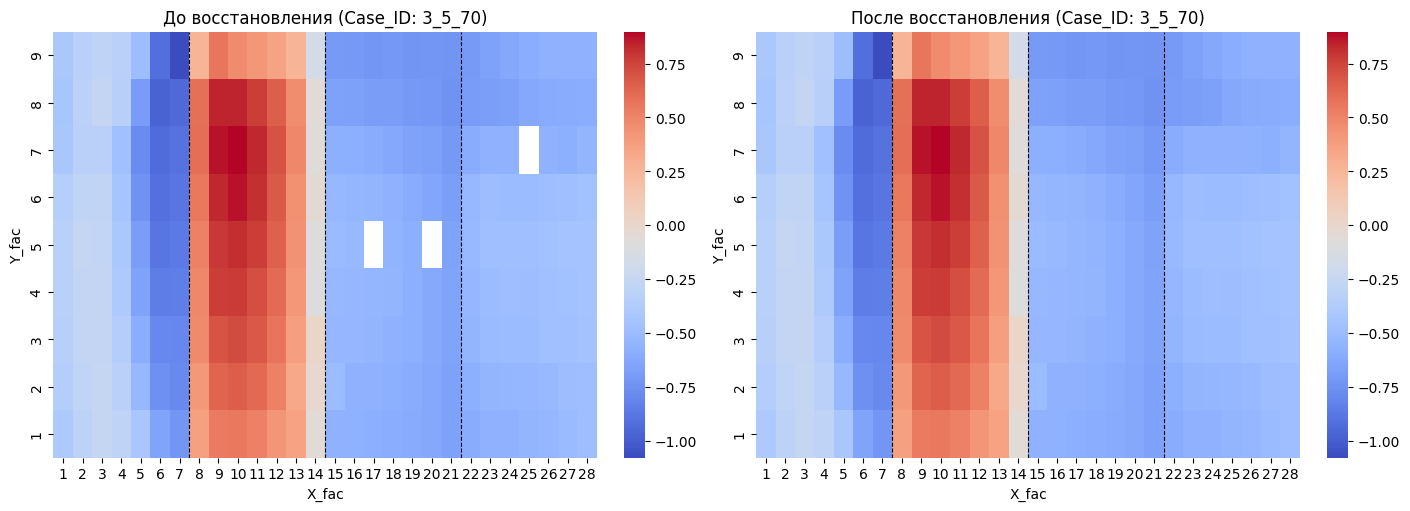

In [11]:
plot_holdout_pressure_comparison(holdout_df, holdout_df_clean)


In [12]:
# 📁 Папка для сохранения графов
HOLDOUT_GRAPH_DIR = "/mnt/d/projects/wind_pressure_prediction_GNN/data/holdout/Graphs_holdout"
os.makedirs(HOLDOUT_GRAPH_DIR, exist_ok=True)

# 🔧 Функция построения edge_index
def build_edge_index(df_case):
    df_case = df_case.reset_index(drop=True)
    node_positions = df_case[["X_fac", "Y_fac"]].values
    node_indices = {tuple(pos): i for i, pos in enumerate(node_positions)}

    X_values = sorted(df_case["X_fac"].unique())
    X_min, X_max = X_values[0], X_values[-1]

    edge_list = []

    for i, (x, y) in enumerate(node_positions):
        neighbors = [
            (x + 1, y),
            (x - 1, y),
            (x, y + 1),
            (x, y - 1)
        ]

        # 🔁 Периодические связи по X (по фасадам)
        if (X_min, y) in node_indices and (X_max, y) in node_indices:
            if x == X_min:
                neighbors.append((X_max, y))
            if x == X_max:
                neighbors.append((X_min, y))

        for nbr in neighbors:
            if nbr in node_indices:
                j = node_indices[nbr]
                edge_list.append((i, j))

    # 🔁 Неориентированный граф
    edge_list += [(j, i) for (i, j) in edge_list]
    edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()
    return edge_index

# 🧠 Формирование графов из holdout_df_clean
def build_gnn_graphs_from_df(df_clean):
    graphs = []
    feature_cols = ["X_int", "Y_int", "Ang", "X_fac", "Y_fac"]
    target_col = "Mean"

    for case_id, group in df_clean.groupby("Case_ID"):
        x = torch.tensor(group[feature_cols].values, dtype=torch.float)

        # ⚠️ y может содержать NaN или 0, это ок
        if target_col in group.columns:
            y = torch.tensor(group[target_col].values, dtype=torch.float).unsqueeze(1)
        else:
            y = None

        edge_index = build_edge_index(group)

        graph = Data(x=x, edge_index=edge_index, y=y)
        graph.case_id = case_id
        graphs.append(graph)

    return graphs

# 🚀 Построение графов для holdout
holdout_graphs = build_gnn_graphs_from_df(holdout_df_clean)

# 💾 Сохранение графов
for i, graph in enumerate(holdout_graphs):
    filename = f"graph_{i:04d}_{graph.case_id}.pt"
    filepath = os.path.join(HOLDOUT_GRAPH_DIR, filename)
    torch.save(graph, filepath)

print(f"✅ Сформировано и сохранено {len(holdout_graphs)} графов в {HOLDOUT_GRAPH_DIR}")


✅ Сформировано и сохранено 122 графов в /mnt/d/projects/wind_pressure_prediction_GNN/data/holdout/Graphs_holdout


In [15]:
# 🔽 Укажи пути к директориям
train_graphs_dir = "/mnt/d/projects/wind_pressure_prediction_GNN/data/processed/Graphs_train"
holdout_graphs_dir = "/mnt/d/projects/wind_pressure_prediction_GNN/data/holdout/Graphs_holdout"

# 🔽 Загружаем графы
def load_graphs_from_dir(folder):
    graphs = []
    for filename in os.listdir(folder):
        if filename.endswith(".pt"):
            path = os.path.join(folder, filename)
            data = torch.load(path, weights_only=False)  # 👈 важно!
            graphs.append(data)
    return graphs


# 📦 Загружаем train и holdout
train_graphs = load_graphs_from_dir(train_graphs_dir)
holdout_graphs = load_graphs_from_dir(holdout_graphs_dir)

# 🔍 Собираем все case_id
train_ids = set([g.case_id for g in train_graphs])
holdout_ids = set([g.case_id for g in holdout_graphs])

# 🔄 Пересечения
common_ids = train_ids.intersection(holdout_ids)

# 📊 Вывод результата
if common_ids:
    print("🚨 Пересекающиеся Case_ID найдены:")
    for cid in sorted(common_ids):
        print(f" - {cid}")
else:
    print("✅ Нет пересекающихся графов. Трейн и холдаут полностью разделены.")


✅ Нет пересекающихся графов. Трейн и холдаут полностью разделены.
